In [3]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [4]:
def sythetic_data(w, b, num_examples):
    """生成 y = Xw + b +噪声 """
    x = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1, 1))

In [9]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = sythetic_data(true_w, true_b, 1000)

In [10]:
features

tensor([[ 1.2412,  0.6204],
        [-0.5749, -0.2384],
        [-1.1754,  0.7111],
        ...,
        [ 0.6390, -0.6191],
        [-0.6220, -0.8328],
        [ 0.4115,  0.7238]])

In [13]:
labels.size()
labels

tensor([[ 4.5743e+00],
        [ 3.8554e+00],
        [-5.8478e-01],
        [ 5.3647e+00],
        [-3.9231e+00],
        [ 8.9826e+00],
        [ 2.4324e+00],
        [ 7.6790e+00],
        [ 1.6156e+00],
        [ 9.8954e+00],
        [ 2.1101e+00],
        [ 3.2962e+00],
        [ 8.0833e+00],
        [-2.6177e+00],
        [-2.7480e+00],
        [ 1.0275e+01],
        [ 8.8936e+00],
        [ 2.7210e+00],
        [ 6.1115e+00],
        [-2.0026e+00],
        [ 4.5539e+00],
        [ 2.0512e+00],
        [ 1.3380e+01],
        [ 2.5809e+00],
        [ 7.2825e+00],
        [ 7.2200e+00],
        [-2.4469e+00],
        [ 6.0361e+00],
        [ 1.0848e+01],
        [ 1.1358e+01],
        [ 1.1437e+00],
        [ 5.2062e+00],
        [ 5.0916e+00],
        [ 5.1764e-01],
        [ 4.7656e+00],
        [ 8.0816e+00],
        [ 8.8671e+00],
        [ 1.2470e+01],
        [-1.4043e-02],
        [ 2.0547e+00],
        [ 7.5846e+00],
        [-5.1334e+00],
        [ 6.1079e+00],
        [ 3

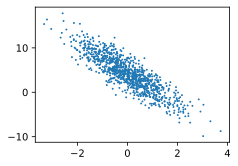

In [14]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [15]:
def data_iter(batch_size, feature, labels):
    num_examples = len(feature)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        yield feature[batch_indices], labels[batch_indices]

In [17]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X,'\n', y)
    break

tensor([[-1.7981,  1.5887],
        [-1.1928, -0.8079],
        [-0.2577, -0.3485],
        [ 0.8015,  0.9506],
        [ 1.0555, -1.1905],
        [-0.1559,  0.7851],
        [ 0.4269,  0.3186],
        [-2.0961, -1.5295],
        [ 2.2771, -1.1433],
        [ 0.3416, -0.4760]]) 
 tensor([[-4.7906],
        [ 4.5714],
        [ 4.8523],
        [ 2.5796],
        [10.3606],
        [ 1.2164],
        [ 3.9669],
        [ 5.1968],
        [12.6297],
        [ 6.4851]])


In [20]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [22]:
def linreg(X, w, b):
    """"线性回归模型"""
    return torch.matmul(X, w) + b

In [23]:
def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [25]:
def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_()

In [26]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for eporch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)

    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch B{eporch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.032158
epoch 2, loss 0.000107
epoch 3, loss 0.000050


In [27]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-7.2718e-05,  3.9339e-05], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0013], grad_fn=<RsubBackward1>)
